In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [19]:
nMTCD=30000

In [20]:
Grouping_Data = pd.read_csv('/home/kangyu/TDCR/Plotting/data/D2D_Grouping/MTCD_grouping_30000.csv')

In [21]:
Grouping_Data.head()

,MTCD_id,x,y,clusters
0,0,-515.140,350.317,0
1,1,-62.455,-71.412,1
2,2,51.550,474.596,2
3,3,602.994,48.948,3
4,4,-928.978,-170.421,4


In [22]:
size = Grouping_Data.groupby('clusters').size()
print(len(size), np.average(size), min(size), max(size))

219 136.986301369863 55 192


In [23]:
ACB_0_5_data = pd.read_csv(f'/home/kangyu/TDCR/Plotting/data/ACB_0.5/ACB_0.5_MTCD_RA_Time_{nMTCD}.csv')
ACB_optimal_data = pd.read_csv(f'/home/kangyu/TDCR/Plotting/data/ACB_optimal/ACB_optimal_MTCD_RA_Time_{nMTCD}.csv')
STD_data = pd.read_csv(f'/home/kangyu/TDCR/Plotting/data/STD/STD_Device_Result_{nMTCD}.csv')
D2D_data = pd.read_csv(f'/home/kangyu/TDCR/Plotting/data/D2D/D2D_Device_Result_{nMTCD}.csv')

In [24]:
D2D_data.head()

,Header,D2D_success,D2D_transmit,RA_init,RA_success,RA_transmit
0,0,-1,2,229,245,1
1,1,-1,3,394,415,1
2,2,-1,1,688,695,1
3,3,-1,1,693,700,1
4,4,-1,1,714,720,1


In [25]:
STD_data.head()

,RA_init,RA_first,RA_success,RA_transmit
0,2000,229,-1,0
1,2000,394,-1,0
2,2000,688,-1,0
3,2000,693,-1,0
4,2000,714,-1,0


In [26]:
print(len(STD_data.loc[STD_data['RA_success'] == -1]))

print(len(ACB_0_5_data.loc[ACB_0_5_data['RA_success'] == -1]))

print(len(ACB_optimal_data.loc[ACB_optimal_data['RA_success'] == -1]))

print(len(D2D_data.loc[D2D_data['RA_success'] == -1]))

28646
19794
0
326


In [27]:
STD_sucess = STD_data.loc[(STD_data['RA_success'] != -1)]
ACB_0_5_data = ACB_0_5_data.loc[(ACB_0_5_data['RA_success'] != -1)]
ACB_optimal_data = ACB_optimal_data.loc[(ACB_optimal_data['RA_success'] != -1)]
D2D_data = D2D_data.loc[(D2D_data['RA_success'] != -1)]

In [28]:
print(np.average(STD_sucess['RA_transmit']))
print(np.average(ACB_0_5_data['RA_transmit']))
print(np.average(ACB_optimal_data['RA_transmit']))
print(np.average(D2D_data['RA_transmit']))

1.0
5.045267489711934
1.0
1.0


In [29]:
print(np.average(STD_sucess['RA_success'] - STD_sucess['RA_first']))
print(np.average(ACB_0_5_data['RA_success'] - ACB_0_5_data['RA_first']))
print(np.average(ACB_optimal_data['RA_success'] - ACB_optimal_data['RA_first']))
print(np.average(D2D_data['RA_success'] - D2D_data['RA_init']))

0.740029542097489
321.13041348226534
396.61676666666665
83.03096987261576


In [30]:
print(np.average(D2D_data.loc[(D2D_data['D2D_success'] != -1), 'D2D_transmit']))

print(np.average(D2D_data.loc[(D2D_data['D2D_success'] != -1), 'D2D_success'] - D2D_data.loc[(D2D_data['D2D_success'] != -1), 'RA_init']))

1.8582583602104905
10.381089797996944


In [31]:
print(np.max(D2D_data['D2D_success']))

988


In [37]:
ACB_0_5_preamble = pd.read_csv(f'/home/kangyu/TDCR/Plotting/data/ACB_0.5/ACB_0.5_Preamble_Status_{nMTCD}.csv')
ACB_optimal_preamble = pd.read_csv(f'/home/kangyu/TDCR/Plotting/data/ACB_optimal/ACB_optimal_Preamble_Status_{nMTCD}.csv')
STD_preamble = pd.read_csv(f'/home/kangyu/TDCR/Plotting/data/STD/STD_Preamble_Status_{nMTCD}.csv')
a = pd.Series(np.zeros(2000), dtype=int)
D2D_preamble = a.add(D2D_data.groupby('RA_success').size(), fill_value = 0)
D2D_preamble.head()

Text(0.5, 1.0, 'cumulative number success device with nMTCD = 30000')

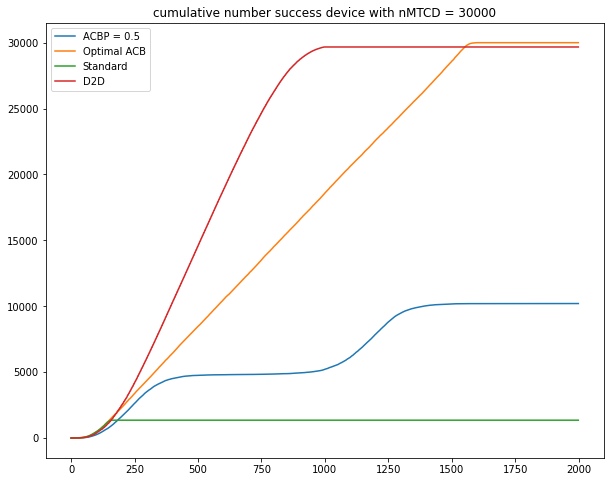

In [62]:
plt.figure(figsize=(10,8))

plt.plot(np.cumsum(ACB_0_5_preamble['success']), label='ACBP = 0.5', ls='-')
plt.plot(np.cumsum(ACB_optimal_preamble['success']), label='Optimal ACB')
plt.plot(np.cumsum(STD_preamble['success']), label='Standard')
plt.plot(np.cumsum(D2D_preamble), label='D2D')

plt.legend()
plt.title('cumulative number success device with nMTCD = 30000')